In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
import os
import gc

warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [10]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
gc.collect()

31

In [29]:
print('Shape of Data: ',df.shape)
print('No of unique customer Id: ', df['CustomerID'].nunique())

df.describe()

Shape of Data:  (200, 5)
No of unique customer Id:  200


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [17]:
## Except Gender all the data types is Integer

In [18]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [58]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [19]:
##Perfect no NULL values....Dont you think this data is too good

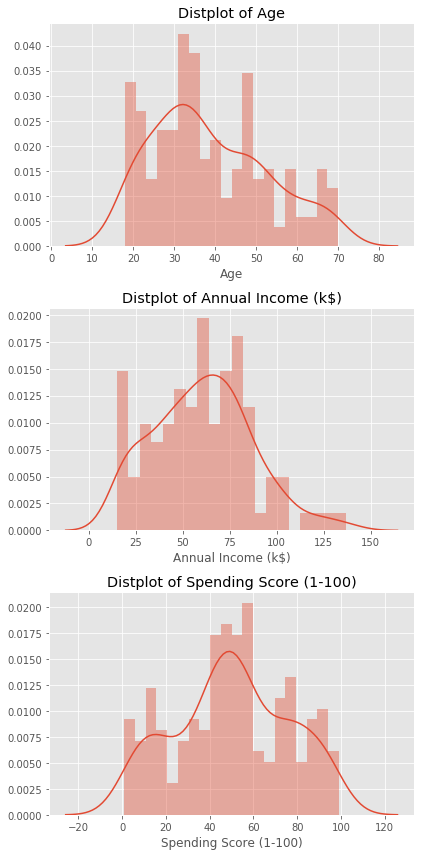

In [52]:
plt.figure(1, figsize = (6,12))
i = 0
for col in df.drop(['CustomerID', 'Gender'], axis =1):
    i = i+1 ## index
    plt.subplot(len(df.columns)-2,1,i)
    ##print(col)
    sns.distplot(df[col], bins = 20)
    
    plt.title('Distplot of {}'.format(col))
    
plt.tight_layout()
plt.show()

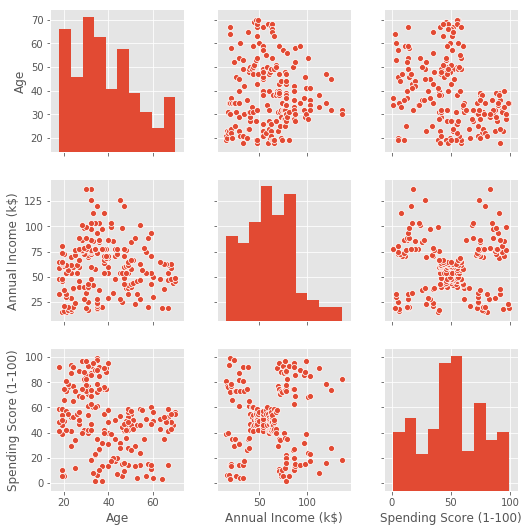

In [30]:
##Dropped the Customer Id column since it is unique for all the rows
sns.pairplot(df.drop(['CustomerID'], axis =1))

In [53]:
# I could see there is a clear segment of customers based on Annual income and spending score

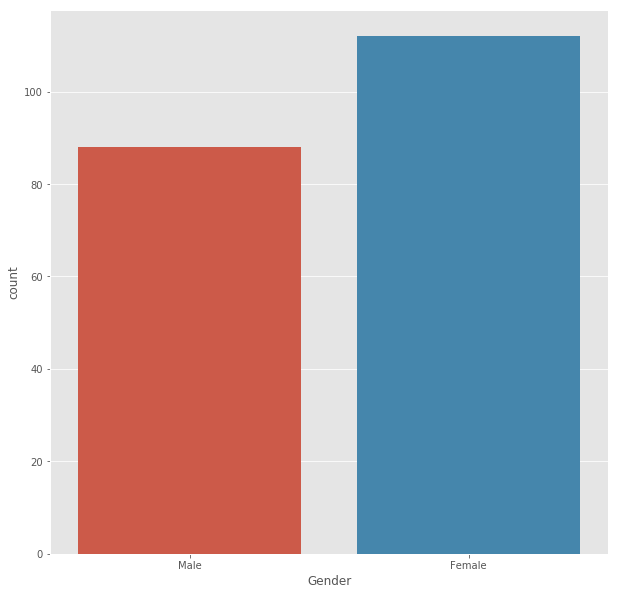

In [56]:
## check biasness of Data

plt.figure(1, figsize = (10,10))
sns.countplot(x = 'Gender', data = df)

In [57]:
## Well I could see there are more number of Female customers than Male Customers

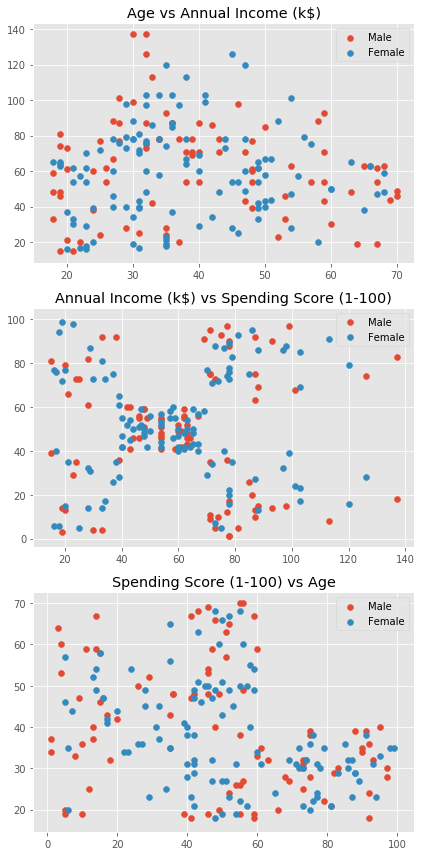

In [67]:
## Age vs Annual Income

plt.figure(1, figsize = (6,12))
idx=0

for (x,y) in [('Age', 'Annual Income (k$)'),('Annual Income (k$)','Spending Score (1-100)'), 
                   ('Spending Score (1-100)', 'Age')]:
    idx += 1
    for gender in ['Male','Female']:
        
        plt.subplot(3,1,idx)
        plt.scatter(x=x, y=y , data = df[df['Gender']== gender], label= gender)
        plt.title('{} vs {}'.format(x,y))
        plt.legend()
        plt.tight_layout()
plt.show()
    

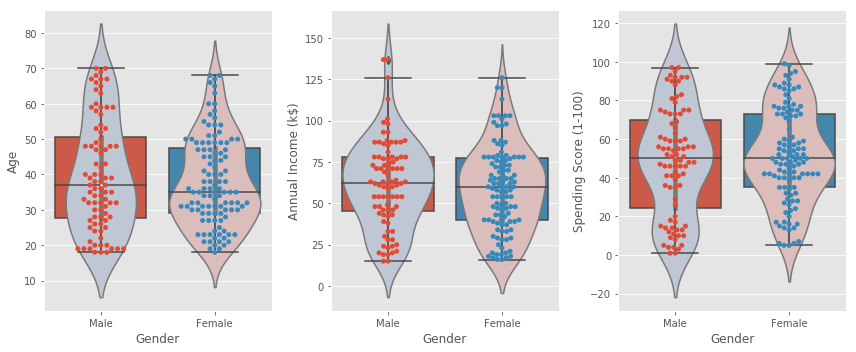

In [78]:
##Distribution of values in Age , Annual Income and Spending Score based on Gender

plt.figure(1, figsize= (12,5))
idx = 0
for col in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    idx +=1
    plt.subplot(1,3,idx)
    sns.violinplot(x = 'Gender', y = col, data = df ,palette = 'vlag')
    sns.swarmplot(x  = 'Gender', y = col, data = df)
    sns.boxplot(x  = 'Gender', y = col, data = df)
    plt.tight_layout()
    

##### Clustering using K- means

In [80]:
#1.Segmentation using Age and Spending Score

X1 = df[['Age', 'Spending Score (1-100)']].iloc[:,:].values

inertia = []
for i in range(1,11):
    algo = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init=10)
    algo.fit(X1)
    inertia.append(algo.inertia_)

In [83]:
inertia

[171535.5,
 75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23830.960393772893,
 19576.013221355326,
 15523.684014328752,
 13099.795415150535,
 11408.825492068849,
 10203.81665765796]

Text(0.5, 1.0, 'Elbow to find the no of clusters for Age and Spending Score')

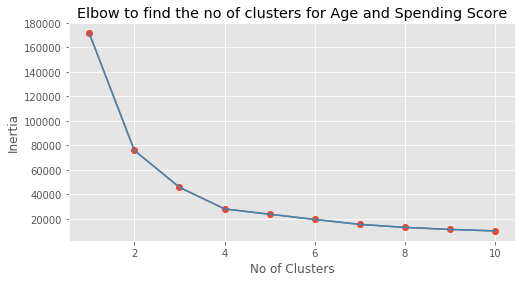

In [100]:
plt.figure(1, figsize = (8,4))

plt.plot(np.arange(1,11),inertia,marker= 'o')
plt.plot(np.arange(1,11),inertia,'-')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow to find the no of clusters for Age and Spending Score')

In [101]:
## From the above graph we are see the elbow is formed at 4. So we are going to use 4 clusters here

In [112]:
algo = KMeans(n_clusters = 4, init= 'k-means++', max_iter = 300, n_init = 10, tol = .0001, random_state = 1987,
         algorithm = 'elkan')

algo.fit(X1)
labels1 = algo.labels_
centroids1 = algo.cluster_centers_

In [113]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algo.predict(np.c_[xx.ravel(), yy.ravel()]) 

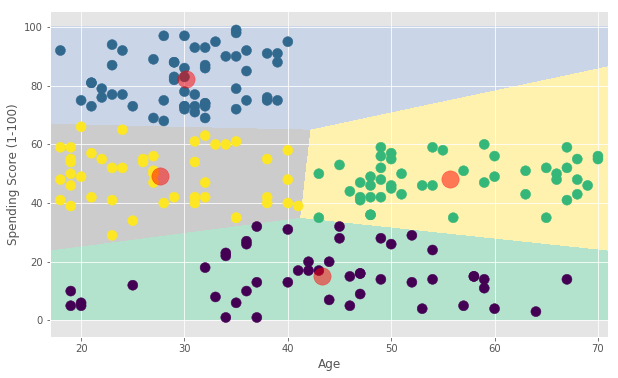

In [117]:
plt.figure(1 , figsize = (10 , 6) )
plt.clf()
Z = Z.reshape(xx.shape)
## Show the boundaries
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
## Show the labels points
plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 100 )
## Show the centroid 
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

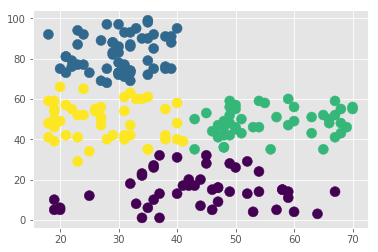

In [119]:
plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 100 )

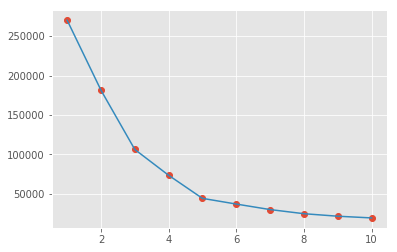

In [130]:
##Segmentation using Annual Income and Spending Score


X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values

inertia = []
for i in range(1,11):
    algo = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init=10)
    algo.fit(X2)
    inertia.append(algo.inertia_)
    
## Show the elbow chart
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-')

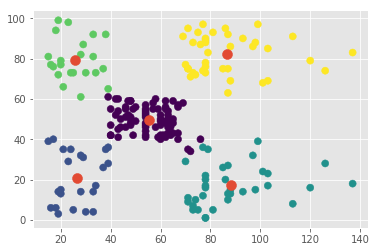

In [135]:
## Here I am using the number of cluster as 5

algo = KMeans(n_clusters = 5, init= 'k-means++', max_iter = 300, n_init=10,tol= .0001, random_state = 1987,
              algorithm= 'elkan')

algo.fit(X2)

labels2=   algo.labels_
centroid2 = algo.cluster_centers_

plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data =df,
           c= labels2, s =50)

plt.scatter(x = centroid2[:,0], y = centroid2[:,1], data =df,
           s =100)

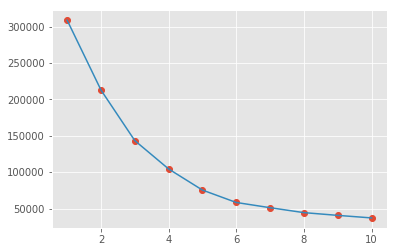

In [138]:
X3 = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values

inertia = []
for i in range(1,11):
    algo = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init=10)
    algo.fit(X3)
    inertia.append(algo.inertia_)
    
## Show the elbow chart
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-')

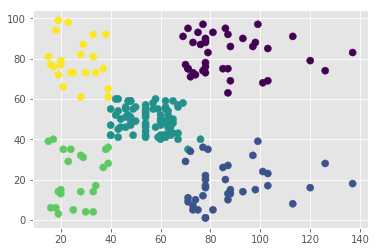

In [140]:
## No of clusters = 5


algo = KMeans(n_clusters = 5, init= 'k-means++', max_iter = 300, n_init=10,tol= .0001, random_state = 1987,
              algorithm= 'elkan')

algo.fit(X3)

labels3=   algo.labels_
centroid3 = algo.cluster_centers_

plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data =df,
           c= labels3, s =50)

#plt.scatter(x = centroid3[:,0], y = centroid3[:,1], data =df,
#           s =100)